### Лабораторная работа 3: Классификация kNN
#### Выполнил студент групы 6131-010402D Кришталь Кирилл

In [44]:
import pandas  as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt


### Задание 1
#### Считать в pandas.DataFrame любой источник данных

In [2]:
df = pd.read_csv("Datasets/Cardiovascular_Disease_Dataset.csv")

In [3]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [5]:
df.isna().any().any()

False

### Задание 2
#### Привести описание датасета:

Этот набор данных о заболеваниях сердца получен в одной из многопрофильных больниц Индии. Более 14 общих признаков делают его одним из самых доступных на данный момент наборов данных о заболеваниях сердца для исследовательских целей. Этот набор данных состоит из 1000 пациентов с 12 признаками. Этот набор данных будет полезен для выявления сердечных заболеваний на ранних стадиях, а также для создания прогностических моделей машинного обучения.

| Признак | Описание | Тип данных |
|:-------:|:--------:|:-----------------:|
| Patient Identification Number | ID пациента | numerical |
| Age | возраст | numerical |
| Gender | пол | numerical |
| Resting blood pressure | Кровяное давление в состоянии покоя | numerical |
| Serum cholesterol | Уровень холестерина в сыворотке крови | numerical |
| Fasting blood sugar | Уровень сахара в крови натощак | numerical | 
| Chest pain type | Тип боли в груди | numerical |
| Resting electrocardiogram results | Результаты электрокардиограммы в состоянии покоя  | numerical |
| Maximum heart rate achieved | Достигнута максимальная частота сердечных сокращений | numerical |
| Exercise induced angina | Стенокардия, вызванная физической нагрузкой | numerical |
| Oldpeak = ST | Oldpeak | numerical |
| Slope of the peak exercise ST segment | Наклон сегмента ST максимального упражнения | numerical |
| Number of major vessels | Количество крупных судов | numerical |
| Classification (target) | Классификация (цель) | boolean | 


### 2. Бинарная классификация

В данном DataFrame отсутствуют категориальные признаки, нет необходимости в кодировке

### Выбрать какое-нибудь значение гиперпараметра k алгоритма kNN

In [6]:
k = 3

### Разбить выборку на обучающую и тестовую

In [7]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Осуществить бинарную классификацию.

In [8]:
model_knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [9]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [10]:
knn_pred = model_knn.predict(X_test)

### Метрики: accuracy, precision, recall, f-measure & classification report


In [11]:
print(f'Accuracy:\t{accuracy_score(y_test, knn_pred)}')
print(f'Precision:\t{precision_score(y_test, knn_pred)}')
print(f'Recall:\t{recall_score(y_test, knn_pred)}')
print(f'F1-measure:\t{f1_score(y_test, knn_pred)}')
print(classification_report(y_test, knn_pred))

Accuracy:	0.48333333333333334
Precision:	0.5167464114832536
Recall:	0.6666666666666666
F1-measure:	0.5822102425876011
              precision    recall  f1-score   support

           0       0.41      0.27      0.32       138
           1       0.52      0.67      0.58       162

    accuracy                           0.48       300
   macro avg       0.46      0.47      0.45       300
weighted avg       0.47      0.48      0.46       300



### Нормализация данных 

In [12]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
data_scaled = pd.DataFrame(scaled, columns=X.columns)


x_train_scale, x_test_scale, y_train_scale, y_test_scale = train_test_split(data_scaled, y, test_size= 0.3, random_state= 42)


### Бинарная классификация после нормализации данных

In [13]:
neighboor_scaled = KNeighborsClassifier(n_neighbors = k)
neighboor_scaled.fit(x_train_scale, y_train_scale)
neighboor_predict_scaled = neighboor_scaled.predict(x_test_scale)

### Метрики после нормализации данных

In [14]:
print(f'Accuracy:\t{accuracy_score(y_test_scale, neighboor_predict_scaled)}')
print(f'Precision:\t{precision_score(y_test_scale, neighboor_predict_scaled)}')
print(f'Recall:\t{recall_score(y_test_scale, neighboor_predict_scaled)}')
print(f'F1-measure:\t{f1_score(y_test_scale, neighboor_predict_scaled)}')
print(classification_report(y_test_scale, neighboor_predict_scaled))

Accuracy:	0.92
Precision:	0.93125
Recall:	0.9197530864197531
F1-measure:	0.9254658385093167
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       138
           1       0.93      0.92      0.93       162

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Все метрики выросли. Нормализация данных очень сильно повлияла на точность

### Корреляционная матрица. Выбор наиболее важных признаков

<Axes: >

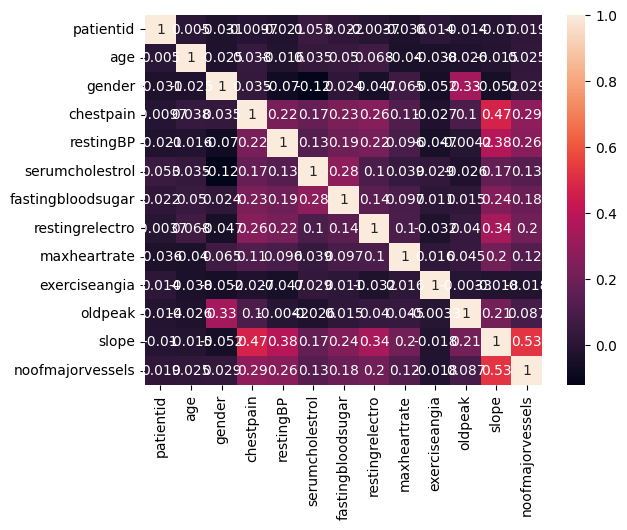

In [15]:
x_corr_matrix = data_scaled.corr()
sns.heatmap(x_corr_matrix, annot = True)

In [16]:
matrix = data_scaled.corr()
np.fill_diagonal(matrix.values, 0)
threshold = 0.4
filtered_corr = matrix.abs() > threshold
feature_importance = filtered_corr.sum(axis=1)
sorted_features = feature_importance.sort_values(ascending=False)
filter_threshold = 0
selected_features = sorted_features[sorted_features > filter_threshold].index
print(selected_features)

Index(['slope', 'chestpain', 'noofmajorvessels'], dtype='object')


In [17]:
selected_features = ["slope", "chestpain","noofmajorvessels"]

x_train_filtered = x_train_scale[selected_features]
x_test_fitered = x_test_scale[selected_features]

neighboor_corr_filtered = KNeighborsClassifier(n_neighbors = k, metric= "euclidean")
neighboor_corr_filtered.fit(x_train_filtered, y_train)
neighboor_predict_filtered = neighboor_corr_filtered.predict(x_test_fitered)

### Метрики с отфильтрованными признаками

In [18]:
print(f'Accuracy:\t{accuracy_score(y_test_scale, neighboor_predict_filtered)}')
print(f'Precision:\t{precision_score(y_test_scale, neighboor_predict_filtered)}')
print(f'Recall:\t{recall_score(y_test_scale, neighboor_predict_filtered)}')
print(f'F1-measure:\t{f1_score(y_test_scale, neighboor_predict_filtered)}')
print(classification_report(y_test_scale, neighboor_predict_filtered))

Accuracy:	0.9466666666666667
Precision:	0.9620253164556962
Recall:	0.9382716049382716
F1-measure:	0.95
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       138
           1       0.96      0.94      0.95       162

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Сравнение результатов "До" и "После" фильтрации, сделать выводы

Метрики улучшились, с учетом уменьшения размерности данных. Можно предположить что, другие признаки не оказывали особого влияния на точность модели

### Перебор значений гиперпараметров k в диапазоне с использованием кросс-валидации 

In [19]:
train_score = []
test_score = []
crossval_score = []

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(model, data_scaled, y, cv = 10, n_jobs= -1)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores.mean()}")
    crossval_score.append(scores.mean())
    model.fit(x_train_scale, y_train_scale)
    pred_train = model.predict(x_train_scale)
    pred_test = model.predict(x_test_scale)
    train_score.append(accuracy_score(y_train_scale, pred_train))
    test_score.append(accuracy_score(y_test_scale, pred_test))

Neighbors: 1, folds count: 10 avg score: 0.9229999999999998
Neighbors: 2, folds count: 10 avg score: 0.9110000000000001
Neighbors: 3, folds count: 10 avg score: 0.9239999999999998
Neighbors: 4, folds count: 10 avg score: 0.922
Neighbors: 5, folds count: 10 avg score: 0.9279999999999999
Neighbors: 6, folds count: 10 avg score: 0.9279999999999999
Neighbors: 7, folds count: 10 avg score: 0.93
Neighbors: 8, folds count: 10 avg score: 0.9289999999999999
Neighbors: 9, folds count: 10 avg score: 0.9349999999999999
Neighbors: 10, folds count: 10 avg score: 0.9269999999999999
Neighbors: 11, folds count: 10 avg score: 0.932
Neighbors: 12, folds count: 10 avg score: 0.929
Neighbors: 13, folds count: 10 avg score: 0.9280000000000002
Neighbors: 14, folds count: 10 avg score: 0.929
Neighbors: 15, folds count: 10 avg score: 0.9279999999999999
Neighbors: 16, folds count: 10 avg score: 0.9200000000000002
Neighbors: 17, folds count: 10 avg score: 0.923
Neighbors: 18, folds count: 10 avg score: 0.921
Nei

### График train/test accuracy в зависимости от значения с отфильтрованными признаками

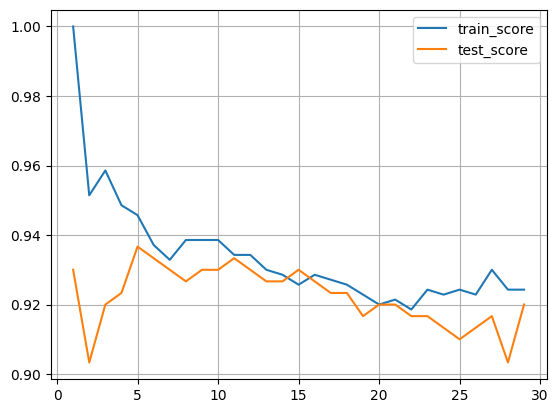

In [20]:
plt.plot(range(1,30), train_score, label = 'train_score')
plt.plot(range(1,30), test_score, label = 'test_score')
plt.legend()
plt.grid()

### 3. Многоклассовая классификация

In [21]:
df_cirrh = pd.read_csv("datasets/liver_cirrhosis.csv")

### 3.1 Описание датасета (многоклассовая классификация )

#### Цирроз возникает в результате длительного повреждения печени, приводящего к образованию обширных рубцов, часто из-за таких заболеваний, как гепатит или хроническое употребление алкоголя. Представленные данные взяты из исследования клиники Майо по первичному билиарному циррозу печени (ПБЦ), проведенного с 1974 по 1984 год.

| Признак | Описание | Тип данных |
|:-------:|:--------:|:-----------------:|
| N_Days | Количество дней между регистрацией и более ранним моментом смерти, трансплантации или анализа результатов исследований | numeric |
| Status | Статус пациента: C (цензурирован), CL (цензурирован из-за трансплантации печени) или D (смерть). | categorical |
| Drug | Тип препарата: D-пеницилламин или плацебо. | boolean |
| Age | Возраст в днях. | numeric |
| Sex | Пол: М (мужской) или Ж (женский) | boolean |
| Hepatomegaly | Наличие гепатомегалии: N (нет) или Y (да) | boolean | 
| Spiders | Наличие "паукообразных" сосудов на коже: N (нет) или Y (да) | boolean |
| Edema | Наличие отека: N (нет отека и отсутствие диуретической терапии отека), S (отек присутствует без диуретической терапии или отек регрессировал после применения диуретиков) или Y (отек, несмотря на диуретическую терапию). | categorical |
| Bilirubin | Уровень билирубина в сыворотке крови в [мг/дл]. | numeric |
| Cholesterol | Уровень холестерина в сыворотке крови в [мг/дл]. | numeric | 
| Albumin | Уровень альбумина в [г/дл]. | numeric |
| Copper |  Уровень меди в моче в [мкг/день] | numeric |
| Alk_Phos | Уровень щелочной фосфатазы в [Единицах/литр] | numeric |
| SGOT |  Уровень аспартатаминотрансферазы (SGOT) в [Единицах/мл]. | numeric | 
| Tryglicerides | Уровень триглицеридов в сыворотке крови в [мг/дл]. | numeric |
| Platelets | Количество тромбоцитов в кубическом [мл/1000]. | numeric |
| Prothrombin | Протромбиновое время в секундах [с]. | numeric |
| Stage | Гистологическая стадия заболевания (1, 2 или 3). | numeric | 





In [22]:
df_cirrh.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [23]:
df_price_values = df_cirrh["Stage"].unique()
print(df_price_values)

[1 2 3]


In [24]:
df_cirrh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [25]:
df_cirrh.isna().any().any()

False

### 3.2 Осуществить предобработку данных


данных типа "NaN" нте, а все остальные признаки в той или иной степени важны 

### 3.3 Кодирование данных

In [26]:

df_cirrhs = df_cirrh.copy()

binary_features = ['Status', 'Drug', 'Sex','Ascites','Hepatomegaly','Spiders','Edema']
label_encode = LabelEncoder()
encoded_features = {}

for feature in binary_features:
    encoded_features[feature] = label_encode.fit_transform(df_cirrhs[feature])
    df_cirrhs[feature] = encoded_features[feature]

df_cirrhs.head() # с кодированием категориальных признаков 



,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


### 3.4 Нормализация данных

In [27]:
X_cirrh = df_cirrhs.drop("Stage", axis = 1)
y_cirrh = df_cirrhs["Stage"]

In [28]:
cirrh_scale = MinMaxScaler()
cirrh_scaled = cirrh_scale.fit_transform(X_cirrh)
cirrh_scaled_pd = pd.DataFrame(cirrh_scaled, columns= X_cirrh.columns)

### 3.5 Выбор гиперпараметра k алгоритма kNN

In [29]:
k = 3

### 3.6 Разделение выборки на обучающую и тестовую

In [30]:
x_train_cirrh, x_test_cirrh, y_train_cirrh, y_test_cirrh = train_test_split(cirrh_scaled_pd, y_cirrh, test_size=0.4, random_state= 42)

### 3.7 Многоклассовая классификация 

In [31]:
model_cirrh = KNeighborsClassifier(n_neighbors=k)
model_cirrh.fit(x_train_cirrh, y_train_cirrh)
model_cirrh_pred = model_cirrh.predict(x_test_cirrh)

### 3.8 Метрики

In [32]:
print(f'Accuracy:\t{accuracy_score(y_test_cirrh, model_cirrh_pred)}')
print(f'Precision (micro):\t{precision_score(y_test_cirrh, model_cirrh_pred, average="micro")}')
print(f'Recall (micro):\t{recall_score(y_test_cirrh, model_cirrh_pred, average="micro")}')
print(f'F1-measure (micro):\t{f1_score(y_test_cirrh, model_cirrh_pred, average="micro")}')
print(classification_report(y_test_cirrh, model_cirrh_pred))

Accuracy:	0.8866
Precision (micro):	0.8866
Recall (micro):	0.8866
F1-measure (micro):	0.8866
              precision    recall  f1-score   support

           1       0.88      0.90      0.89      3305
           2       0.87      0.87      0.87      3440
           3       0.91      0.90      0.91      3255

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### 3.9 Корреляционная матрица. Выбор наиболее важных признаков

<Axes: >

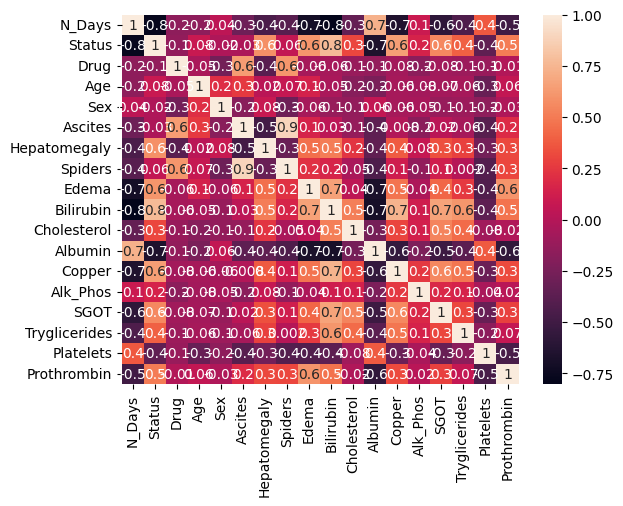

In [33]:
matrix_cirrh = cirrh_scaled_pd.corr()
sns.heatmap(matrix_cirrh.corr(), annot = True, fmt='.1g')

In [34]:
np.fill_diagonal(matrix_cirrh.values, 0)
threshold_cirrh = 0.4
filtered_corr_cirrh = matrix_cirrh.abs() > threshold_cirrh
feature_importance_cirrh = filtered_corr_cirrh.sum(axis=1)
sorted_features_cirrh = feature_importance_cirrh.sort_values(ascending=False)
filter_threshold_cirrh = 0
selected_features_cirrh = sorted_features_cirrh[sorted_features_cirrh > filter_threshold_cirrh].index
print(selected_features_cirrh)

Index(['Bilirubin', 'Ascites', 'Spiders', 'Copper', 'Status'], dtype='object')


### 3.10 Многоклассовая классификация с отфильтрованными признаками

In [35]:
selected_features_cirrh = ['Bilirubin','Ascites','Spiders','Copper','Status',]

# Отфильтровываем данные по выбранным признакам
x_train_cirrh_filtered = x_train_cirrh[selected_features_cirrh]
x_test_cirrh_filtered = x_test_cirrh[selected_features_cirrh]

# Обучаем модель с отфильтрованными признаками
cirrh_filtered = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
cirrh_filtered.fit(x_train_cirrh_filtered, y_train_cirrh)
predict_star_filtered = cirrh_filtered.predict(x_test_cirrh_filtered)

### 3.11 Метрики после классификации 

In [36]:
print(f'Accuracy:\t{accuracy_score(y_test_cirrh, predict_star_filtered)}')
print(f'Precision (micro):\t{precision_score(y_test_cirrh, predict_star_filtered, average="micro")}')
print(f'Recall (micro):\t{recall_score(y_test_cirrh, predict_star_filtered, average="micro")}')
print(f'F1-measure (micro):\t{f1_score(y_test_cirrh, predict_star_filtered, average="micro")}')
print(classification_report(y_test_cirrh, predict_star_filtered))

Accuracy:	0.7955
Precision (micro):	0.7955
Recall (micro):	0.7955
F1-measure (micro):	0.7955
              precision    recall  f1-score   support

           1       0.77      0.78      0.78      3305
           2       0.78      0.77      0.77      3440
           3       0.84      0.84      0.84      3255

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



### 3.12 Сравнить результаты "до" и "после" фильтрации, сделать выводы

Качество метрик снизилось, при этом использовалось меньше половины признаков

### 3.13 Перебор гиперпараметров k в определенном диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. 
#### Построить график train/test accuracy в зависимости от значения 

In [37]:
train_cirrhs_score = []
test_cirrhs_score = []
crossval_cirrhs_score = []

for k in range(1, 30):
    model_cirrhs = KNeighborsClassifier(n_neighbors=k)
    scores_cirrhs = cross_val_score(model_cirrhs, cirrh_scaled_pd, y_cirrh, cv = 9)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores_cirrhs.mean()}")
    crossval_cirrhs_score.append(scores_cirrhs.mean())
    model_cirrhs.fit(x_train_cirrh_filtered, y_train_cirrh)
    pred_star_train = model_cirrhs.predict(x_train_cirrh_filtered)
    pred_star_test = model_cirrhs.predict(x_test_cirrh_filtered)
    train_cirrhs_score.append(accuracy_score(y_train_cirrh, pred_star_train))
    test_cirrhs_score.append(accuracy_score(y_test_cirrh, pred_star_test))

Neighbors: 1, folds count: 10 avg score: 0.8934410346200033
Neighbors: 2, folds count: 10 avg score: 0.878883135514085
Neighbors: 3, folds count: 10 avg score: 0.8938850178265897
Neighbors: 4, folds count: 10 avg score: 0.8860454433360851
Neighbors: 5, folds count: 10 avg score: 0.885445981030196
Neighbors: 6, folds count: 10 avg score: 0.8808863169952527
Neighbors: 7, folds count: 10 avg score: 0.8801263633875079
Neighbors: 8, folds count: 10 avg score: 0.8747666769301596
Neighbors: 9, folds count: 10 avg score: 0.8713666320450215
Neighbors: 10, folds count: 10 avg score: 0.8672069648183998
Neighbors: 11, folds count: 10 avg score: 0.864046843123274
Neighbors: 12, folds count: 10 avg score: 0.8586470158368605
Neighbors: 13, folds count: 10 avg score: 0.8565670525976214
Neighbors: 14, folds count: 10 avg score: 0.8527670541128045
Neighbors: 15, folds count: 10 avg score: 0.8509270140635778
Neighbors: 16, folds count: 10 avg score: 0.8464071451885578
Neighbors: 17, folds count: 10 avg s

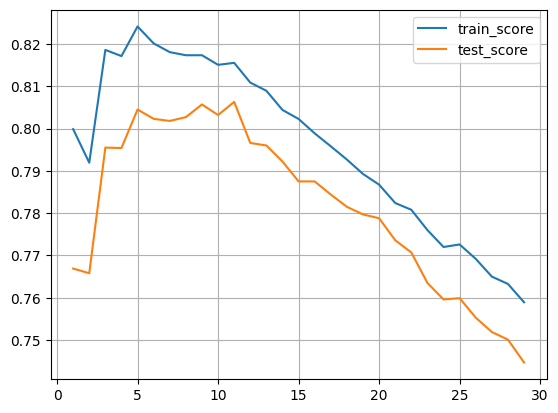

In [38]:
plt.plot(range(1, 30), train_cirrhs_score, label = 'train_score')
plt.plot(range(1, 30), test_cirrhs_score, label = 'test_score')
plt.legend()
plt.grid()

### 3.14 Для лучшего классификатора привести метрики, classification_report, построить confusion matrix
#### Лучший результат классификатор достигает при K = 10 

In [41]:
best = test_cirrhs_score.index(max(test_cirrhs_score[1:]))
best

10

In [42]:
model_finish = KNeighborsClassifier(n_neighbors=10)
model_finish.fit(x_train_cirrh_filtered, y_train_cirrh)
pred_finish = model_finish.predict(x_test_cirrh_filtered)

In [43]:
print(f'Accuracy:\t{accuracy_score(y_test_cirrh, pred_finish)}')
print(f'Precision (micro):\t{precision_score(y_test_cirrh, pred_finish, average="micro")}')
print(f'Recall (micro):\t{recall_score(y_test_cirrh, pred_finish, average="micro")}')
print(f'F1-measure (micro):\t{f1_score(y_test_cirrh, pred_finish, average="micro")}')
print(classification_report(y_test_cirrh, pred_finish))

Accuracy:	0.8032
Precision (micro):	0.8032
Recall (micro):	0.8032
F1-measure (micro):	0.8032
              precision    recall  f1-score   support

           1       0.81      0.78      0.79      3305
           2       0.78      0.79      0.78      3440
           3       0.83      0.85      0.84      3255

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



<Axes: >

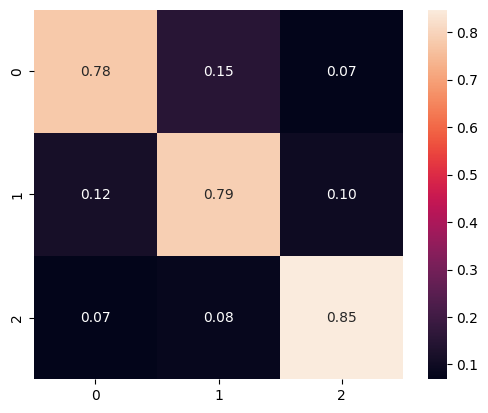

In [45]:
sns.heatmap(data=confusion_matrix(y_test_cirrh, pred_finish, normalize='true'), square=True, annot=True, fmt='.2f')